# Исследование тарифов оператора сотовой связи

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо выполнить анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Данные содержаться в файлах 'users.csv', 'calls.csv', 'internet.csv', 'messages.csv', 'tariffs.csv'.
Таблица users (информация о 500 пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о 202607 звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о 123036 сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об 149396 интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<b> План исследования:</b>
- Открыть и узичить файлы данных
- Подготовить данные
- Проанализировать данные
- Проверить гитопетезы 
- Общие выводы

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

## Шаг 1. Открытие файлов с данными и изучение общей информации

In [3]:
users = pd.read_csv('f:/Yandex-Practicum/datasets/users.csv') # чтение данных 
users.info() # просмотр размера таблицы, типов данных, количества non-null
users.head() # просмотр первых строк данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
calls = pd.read_csv('f:/Yandex-Practicum/datasets/calls.csv') # чтение данных 
calls.info() # просмотр размера таблицы, типов данных, количества non-null
calls.head() # просмотр первых строк данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet = pd.read_csv('f:/Yandex-Practicum/datasets/internet.csv', index_col=False) # чтение данных 
internet.info() # просмотр размера таблицы, типов данных, количества non-null
internet.head() # просмотр первых строк данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
messages = pd.read_csv('f:/Yandex-Practicum/datasets/messages.csv') # чтение данных 
messages.info() # просмотр размера таблицы, типов данных, количества non-null
messages.head() # просмотр первых строк данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs = pd.read_csv('f:/Yandex-Practicum/datasets/tariffs.csv') # чтение данных 
tariffs.info() # просмотр размера таблицы, типов данных, количества non-null
tariffs.head() # просмотр первых строк данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод
Данные загружены, есть пропуски в столбце churn_date

## Шаг 2. Подготовка данных

### План подготовки данных

1. Проверить наличие пропусков в данных, заполнить пропуски

2. Преобразовать даты в datetime, вещественные данные в целочисленные, если возможно

3. Проверить наличие дубликатов, обработать дубликаты

4. Найти и исправить ошибки в данных, если они есть (пропущенные звонки с 0 длительностью не ошибки!)

5. Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### 2.1. Обработка пропусков

В данных о пользователях имеется столбец с пропусками в дате прекращения пользования тарифом у тех, кто не прекратил пользоваться. Другие таблицы без пропусков.


In [8]:
users.isna().sum() #Количество пропущенных значений

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

462 клиента не прекратили пользоваться тарифами, поэтому пропущена дата окончаний использования.


Варианты заполнения пропусков 
1. Пропуски значений "дата отключений" заполнить датой подключения, чтобы их разность была равна нулю - "заметное" значение для дальнейшего анализа.
2. Заполнить пропуски датой выгрузки данных 
3. **Исключить даты регистрации и отключения, т.к. не используются для дальнейшего анализа**

In [9]:
users.drop(['churn_date', 'reg_date'], axis=1, inplace=True)

### 2.2. Замена типа данных

Перевод дат в datetime, добавление столбца Месяц 




In [10]:
#users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
#print('' if users[users['reg_date'] == users['churn_date']]['reg_date'].count() == 462 else 'Заменить способ заполнения пустых дат отключения') 
#определение количества совпатений дат подключения и отключения клиентов, заполнено 462 значения даты отключения
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')


calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month



In [11]:
calls['duration'].where(calls['duration'] == 0, np.ceil(calls['duration']), inplace=True)
calls['duration'] = calls['duration'].astype(int)
calls.dtypes

id                   object
call_date    datetime64[ns]
duration              int32
user_id               int64
month                 int64
dtype: object

**Вывод**

Все даты переведены в datetime.

Добавлены столбцы Месяц.

Длительность звонков округлена вверх и преобразована в целые значения.

### 2.3. Обработка дубликатов

In [12]:
# число явных дубликатов, число явных дубликатов в данных без пропусков
print('Явных дубликатов пользователей:', users.duplicated().sum(),'\n', 
      'Явных дубликатов звонков:', calls.duplicated().sum(),'\n', 
      'Явных дубликатов интернет сессий:', internet.duplicated().sum(),'\n', 
      'Явных дубликатов сообщений:', messages.duplicated().sum())

Явных дубликатов пользователей: 0 
 Явных дубликатов звонков: 0 
 Явных дубликатов интернет сессий: 0 
 Явных дубликатов сообщений: 0


**Вывод**

Явных дубликатов в данных нет

### 2.4. Найти и исправить ошибки в данных

In [13]:
print(users.describe())
print(calls.describe())
print(internet.describe())
print(messages.describe())

       user_id    age
count   500.00 500.00
mean  1,249.50  46.59
std     144.48  16.67
min   1,000.00  18.00
25%   1,124.75  32.00
50%   1,249.50  46.00
75%   1,374.25  62.00
max   1,499.00  75.00
        duration    user_id      month
count 202,607.00 202,607.00 202,607.00
mean        7.16   1,253.94       8.57
std         5.96     144.72       2.79
min         0.00   1,000.00       1.00
25%         2.00   1,126.00       7.00
50%         6.00   1,260.00       9.00
75%        11.00   1,379.00      11.00
max        38.00   1,499.00      12.00
       Unnamed: 0    mb_used    user_id      month
count  149,396.00 149,396.00 149,396.00 149,396.00
mean    74,697.50     370.19   1,252.10       8.56
std     43,127.05     278.30     144.05       2.79
min          0.00       0.00   1,000.00       1.00
25%     37,348.75     138.19   1,130.00       7.00
50%     74,697.50     348.01   1,251.00       9.00
75%    112,046.25     559.55   1,380.00      11.00
max    149,395.00   1,724.83   1,499.00    

В таблице Internet есть лишний столбец 'Unnamed: 0' с порядковым номером сессии, его можно удалить.
Также присутствуют около 20 тысяч записей с нулевым трафиком, их тоже удаляю.

In [14]:
if 'Unnamed: 0' in internet.columns:
    internet.drop('Unnamed: 0', axis=1, inplace=True)
internet.columns
print(internet.shape)
internet = internet.query('mb_used > 0')

(149396, 5)


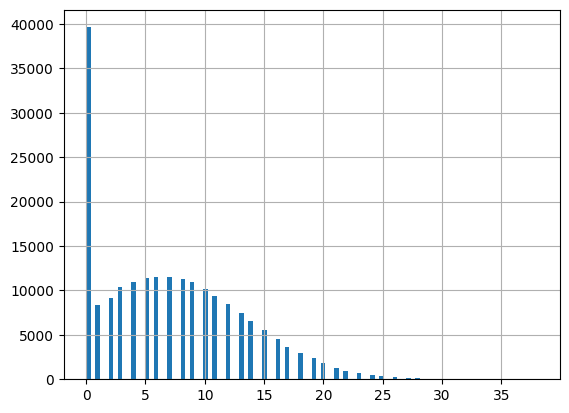

In [15]:
calls['duration'].hist(bins=100);

In [16]:
calls = calls.query('duration > 0')

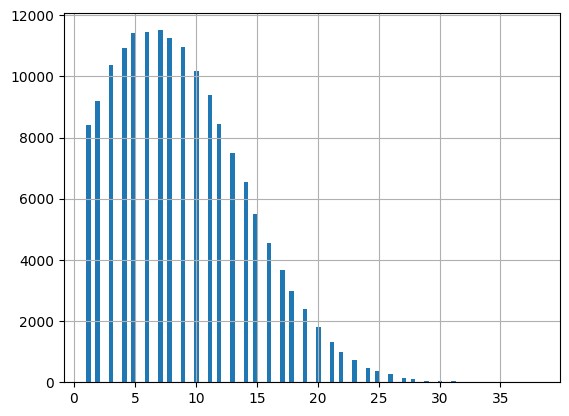

In [17]:
calls['duration'].hist(bins=100);

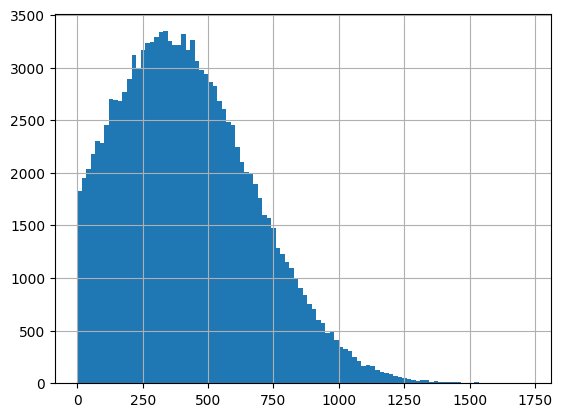

In [18]:
internet['mb_used'].hist(bins=100);

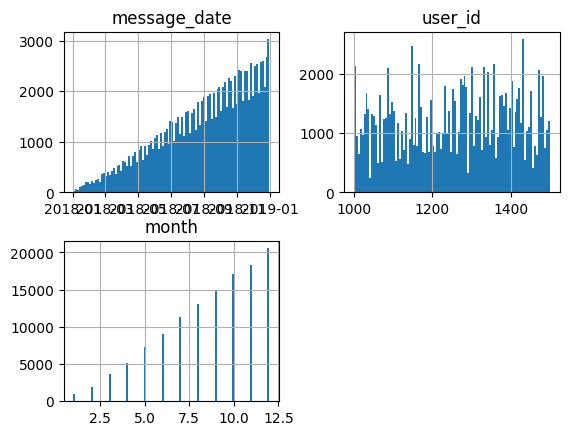

In [19]:
messages.hist(bins=100);

**Вывод**

В Таблице интернет сессий удалены около 20 тысяч записей с нулевым трафиком 

### 2.5. Расчет значений для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [20]:
#количество сделанных звонков и израсходованных минут разговора по месяцам;
calls_per_month = calls[calls['duration']>0].pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum','count'])
calls_per_month.columns = ['calls_sum','calls_count']
#calls_per_month

In [21]:
#объем израсходованного интернет-трафика по месяцам;
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
#internet_per_month

In [22]:
#количество отправленных сообщений по месяцам;
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_per_month.columns = ['messages_sum']
#messages_per_month

In [23]:
#помесячную выручку с каждого пользователя

summary = (calls_per_month
           .merge(internet_per_month, on=['user_id',	'month'], how='outer')
           .merge( messages_per_month, on=['user_id',	'month'], how='outer')
           #.join( users.set_index('user_id').loc[:,['age','churn_date',	'city',	'reg_date',	'tariff']])
           .join( users.set_index('user_id').loc[:,['age','city','tariff']])
           .sort_values(['user_id', 'month'])
           .fillna(0)
           )

#summary.fillna(0,inplace=True) # заполняю пропуски нулями для расчета выручки
#summary.isna().sum()

In [24]:
#Функция возвращает стоимость за месяц с учетом тарифа и потраченных минут, сообщений и Мб
#помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, 
#сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
def total_pay (row):
    row.fillna(0,inplace=True)
    ind = tariffs[tariffs['tariff_name'] == row['tariff']].index.item()
    total_pay_rub = (tariffs.loc[ind,'rub_monthly_fee'] 
                   + max(0, row['calls_sum'] - tariffs.loc[ind,'minutes_included']) 
                   * tariffs.loc[ind,'rub_per_minute']
                   + np.ceil(max(0, row['mb_used'] - tariffs.loc[ind,'mb_per_month_included']) / 1024) # Целое число гигабайт
                   * tariffs.loc[ind,'rub_per_gb']
                   + max(0, row['messages_sum'] - tariffs.loc[ind,'messages_included']) 
                   * tariffs.loc[ind,'rub_per_message']
                   )
    return total_pay_rub

    

In [25]:
summary['total_pay'] = summary.apply(total_pay,axis=1)
summary

calls_sum  calls_count   mb_used  messages_sum  age  \
user_id month                                                        
1000    5         159.00        17.00  2,253.49         22.00   52   
        6         172.00        28.00 23,233.77         60.00   52   
        7         340.00        41.00 14,003.64         75.00   52   
        8         408.00        42.00 14,055.93         81.00   52   
        9         466.00        46.00 14,568.91         57.00   52   
...                  ...          ...       ...           ...  ...   
1498    10        247.00        30.00 20,579.36         42.00   68   
1499    9          70.00         8.00  1,845.75         11.00   35   
        10        449.00        44.00 17,788.51         48.00   35   
        11        612.00        62.00 17,963.31         59.00   35   
        12        492.00        56.00 13,055.58         66.00   35   

                      city tariff  total_pay  
user_id month                                 
1000    5        Краснодар  ultra   1,950.00  
        6        Краснодар  ultra   1,950.00  
        7        Краснодар  ultra   1,950.00  
        8        Краснодар  ultra   1,950.00  
        9        Краснодар  ultra   1,950.00  
...                    ...    ...        ...  
1498    10     Владикавказ  smart   1,750.00  
1499    9            Пермь  smart     550.00  
        10           Пермь  smart   1,150.00  
        11           Пермь  smart   1,513.00  
        12           Пермь  smart     598.00  

[3214 rows x 8 columns]

**Вывод**

Выполнен расчет значений для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя (вычтен бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножен на значение из тарифного плана; прибавлена абонентская плата, соответствующая тарифному плану).

Получено 3214 записей, средний пользователь пользовался связью 6,4 месяца.

**Но** не учтено время использования тарифом внутри месяца, первый и последний месяцы использования могут быть не полными.

### Выводы по предобработке:

**2.1. Найдены и заполнены пропуски в данных:**

найдены и заполнены 462 пропуска в дате отключения.

**2.2. Преобразованы типы данных:**

Все даты переведены в datetime.

Добавлены столбцы Месяц.

Длительность звонков округлена вверх и преобразована в целые значения.

**2.3. Явные дубликаты в данных отсутствуют.**


**2.4. Ошибки в данных:**

В Таблице интернет сессий удален избыточный столбец 

**2.5. Выполнен расчет значений для каждого пользователя:**

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя (вычтен бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножен на значение из тарифного плана; прибавлена абонентская плата, соответствующая тарифному плану).

## Шаг 3. Проанализировать данные

### План анализа данных

Проанализировать потребности пользователей каждого тарифа в месяц: 
- сколько минут разговора; 
- сколько сообщений;
- какой объём интернет-трафика.

Проанализировать распределения:
- определить среднее количество; 
- определить дисперсию;
- определить стандартное отклонение; 
- построить гистограммы;
- описать распределения.

Описать поведение клиентов оператора, исходя из выборки

### Анализ данных 

потребностей пользователей каждого тарифа в месяц

сколько минут разговора;
сколько сообщений;
какой объём интернет-трафика.

In [26]:
display(users.pivot_table(index='tariff',values=['user_id'],aggfunc=['count'])/500) # доля клиентов на каждом тарифе
summary.pivot_table(index='tariff',values=['calls_sum'],aggfunc=['count']) 


,count
,user_id
tariff,
smart,0.70
ultra,0.30


,count
,calls_sum
tariff,
smart,2229
ultra,985


In [27]:
summary.pivot_table(index='tariff',values=['calls_sum', 'mb_used','messages_sum','total_pay'],aggfunc=['mean','median', 'max'])


mean                                     median            \
       calls_sum   mb_used messages_sum total_pay calls_sum   mb_used   
tariff                                                                  
smart     417.93 16,208.39        33.38  1,289.97    422.00 16,506.84   
ultra     526.62 19,468.81        49.36  2,070.15    518.00 19,308.01   

                                    max                                   
       messages_sum total_pay calls_sum   mb_used messages_sum total_pay  
tariff                                                                    
smart         28.00  1,023.00  1,435.00 38,552.45       143.00  6,770.00  
ultra         38.00  1,950.00  1,673.00 49,745.69       224.00  4,800.00

In [28]:
summary.pivot_table(index='tariff',values=['calls_sum', 'mb_used','messages_sum'],aggfunc=['var', 'std'])


var                                   std                       
        calls_sum        mb_used messages_sum calls_sum   mb_used messages_sum
tariff                                                                        
smart   36,219.32  34,462,496.46       796.81    190.31  5,870.48        28.23
ultra  100,873.63 101,751,013.78     2,285.27    317.61 10,087.17        47.80

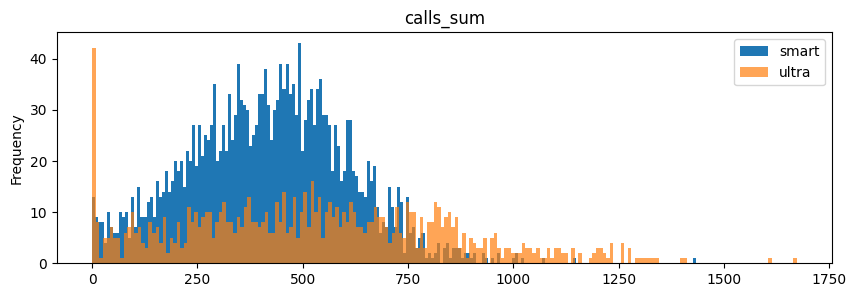

In [29]:
summary.query('tariff == "smart"')['calls_sum'].plot(kind='hist', bins=200, alpha=1, figsize=(10,3),legend=True, label="smart",title='calls_sum')
summary.query('tariff == "ultra"')['calls_sum'].plot(kind='hist', bins=200, alpha=0.7,legend=True, label="ultra");

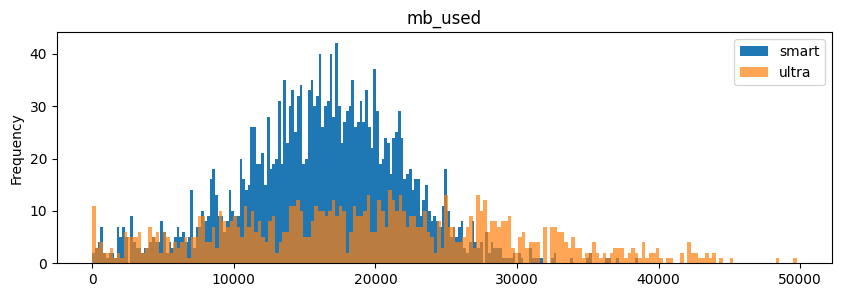

In [30]:
summary.query('tariff == "smart"')['mb_used'].plot(kind='hist', bins=200, alpha=1, figsize=(10,3),legend=True, label="smart",title='mb_used')
summary.query('tariff == "ultra"')['mb_used'].plot(kind='hist', bins=200, alpha=0.7, legend=True, label="ultra");

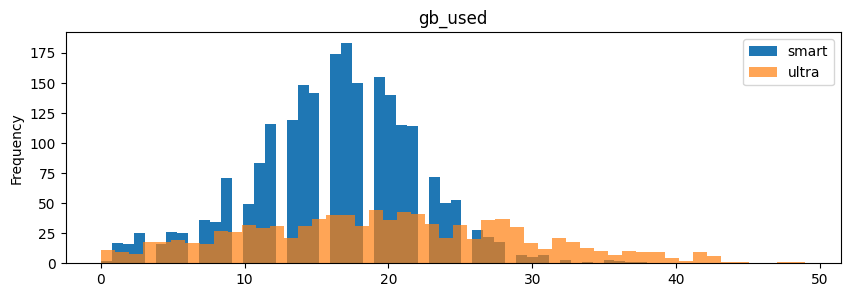

In [31]:
np.ceil(summary.query('tariff == "smart"')['mb_used']/1024).plot(kind='hist', bins=50, alpha=1, figsize=(10,3),legend=True, label="smart",title='gb_used')
np.ceil(summary.query('tariff == "ultra"')['mb_used']/1024).plot(kind='hist', bins=50, alpha=0.7,legend=True, label="ultra");

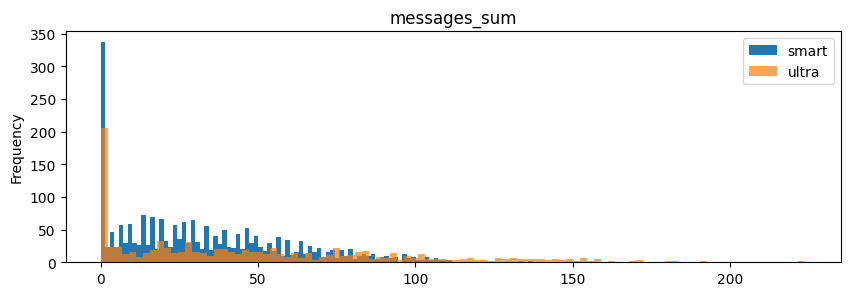

In [32]:
summary.query('tariff == "smart"')['messages_sum'].plot(kind='hist', bins=100, alpha=1, figsize=(10,3),legend=True, label="smart",title='messages_sum')
summary.query('tariff == "ultra"')['messages_sum'].plot(kind='hist', bins=100, alpha=0.7,legend=True, label="ultra");

In [33]:
print('Количество человек, не пользующихся звонками: ', (500 - len(calls['user_id'].unique())))
print('Количество человек, не пользующихся интернетом: ', (500 - len(internet['user_id'].unique())))
print('Количество человек, не пользующихся сообщениями: ', (500 - len(messages['user_id'].unique())))


Количество человек, не пользующихся звонками:  8
Количество человек, не пользующихся интернетом:  3
Количество человек, не пользующихся сообщениями:  74


### Анализ динамики выручки по месяцам в разрезе тарифов

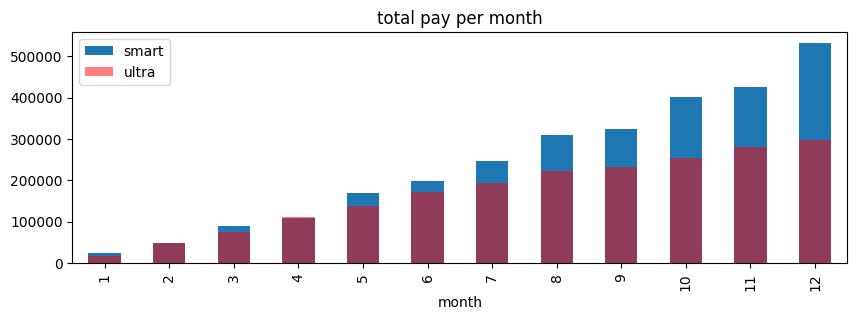

In [34]:
summary.query('tariff == "smart"').groupby(by='month')['total_pay'].sum().plot(kind='bar', figsize=(10,3),legend=True, label="smart",title='total pay per month')
summary.query('tariff == "ultra"').groupby(by='month')['total_pay'].sum().plot(kind='bar', alpha=0.5, legend=True, label="ultra",color='red');


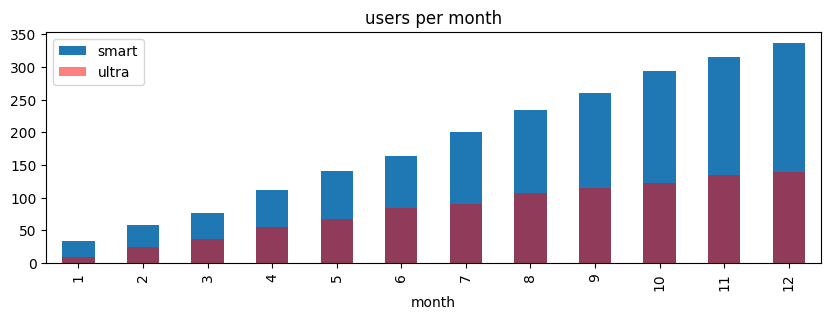

In [35]:
summary.query('tariff == "smart"').groupby(by='month')['total_pay'].count().plot(kind='bar', figsize=(10,3),legend=True, label="smart",title='users per month')
summary.query('tariff == "ultra"').groupby(by='month')['total_pay'].count().plot(kind='bar', alpha=0.5, legend=True, label="ultra",color='red');

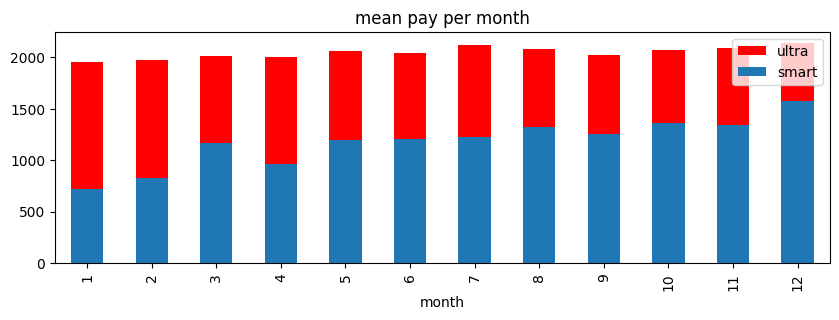

In [36]:
summary.query('tariff == "ultra"').groupby(by='month')['total_pay'].mean().plot(kind='bar', alpha=1, legend=True, label="ultra",color='red')
summary.query('tariff == "smart"').groupby(by='month')['total_pay'].mean().plot(kind='bar', alpha=1, figsize=(10,3),legend=True, label="smart",title='mean pay per month');


Наблюдаются ежемесячные увеличения выручек для каждого тарифа, обусловленные увеличением среднемесячной платы клиентов тарифа Смарт и увеличинием числа клиентов обоих тарифов.

**Вывод**

Выполнен расчет средних и медианных значений длительностей разговоров, количества сообщений и интернет-трафика: 
- Тариф смарт ~70% клиентов, 418 минут, 16208 МБ, 33,4 сообщения.  
- Тариф ультра ~30% клиентов, 526 минут, 19468,8 МБ, 49,4 сообщения 

В тарифе ультра медиана платы равна стоимости тарифа, т.е. по крайней мере половина клиентов "ультра" платит только абон плату.

Для сообщений медиана заметно меньше среднего, значит распределения с положительной скошенностью.

Распределения для звонков: 
- тариф смарт медиана *больше* среднего => отрицательная скошенность 
- тариф ультра медиана *меньше* среднего => положительная скошенность 

Распределения для интернет-трафика: 
- тариф смарт медиана *больше* среднего => отрицательная скошенность 
- тариф ультра медиана *меньше* среднего => положительная скошенность 

Исходя из выборки можно составить следующее описание поведения клиентов, использующих разные тарифы: 
- Клиенты "Смарт" совершают (418 ± 3\*190) мин звонков, 
используют (16208 ± 3\*5870) МБ трафика, 
отправляют (33 ± 3\*28) сообщений.

- Клиенты "Ультра" совершают (526 ± 3\*317) мин звонков, 
используют (19468 ± 3\*10087) МБ трафика, 
отправляют (49 ± 3\*48) сообщений.

Таким образом, клиенты тарифа "Ультра" используют большее количество услуг, кроме того при сопоставимых средних значениях для клиентов с разными тарифами, клиенты тарифа "Смарт" имеют более компактные распределения (меньшую дисперсию) потребляемых услуг.

Часть клиентов использует не все типы услуги. Звонками не воспользовались 8 человек, интернетом - 3, сообщениями - 74.







## Шаг 4. Проверка гипотез

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### 4.1. Выручка пользователей

Необходимо проверить, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Формулируется нулевая гипотеза, что выручки равны, и первая гипотеза, что выручки различаются.

В распоряжении две выборки из генеральных совокупностей клиентов тарифов «Ультра» и «Смарт».

Для этого используется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var).

Необходимо проверить размер выборок, если размеры не равны, то выбирается парметр с неравными дисперсиями, уровень значимости задается равным 0,01.

Дополнительно проверяется гипотеза о том, что среднее значение выручки пользователей "Ультра" больше среднего значения выручки пользователей "Смарт".

In [37]:
alpha = .01
equal_var = len(summary.query('tariff == "smart"')) == len(summary.query('tariff == "ultra"'))

results = st.ttest_ind(
    summary.query('tariff == "smart"')['total_pay'], 
    summary.query('tariff == "ultra"')['total_pay'],equal_var=equal_var)

print(f'p-значение для двухсторонней гипотезы:  {results.pvalue}; для односторонней гипотезы: {results.pvalue / 2}')
print('Проверка двухсторонней гипотезы')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Проверка односторонней гипотезы')
if (results.pvalue < alpha) and summary.query('tariff == "smart"')['total_pay'].mean() < summary.query('tariff == "ultra"')['total_pay'].mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")     

p-значение для двухсторонней гипотезы:  4.2606313931076085e-250; для односторонней гипотезы: 2.1303156965538042e-250
Проверка двухсторонней гипотезы
Отвергаем нулевую гипотезу
Проверка односторонней гипотезы
Отвергаем нулевую гипотезу


**Вывод**

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 4e-250. Поэтому нулевая гипотеза отвергается, т.е. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Кроме того, по результатам теста не отвергается гипотеза о том, что выручка пользователей тарифа "Ультра" больше выручки пользователей тарифа "Смарт".

### 4.2. Пользователи из Москвы 

Необходимо проверить, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Формулируется нулевая гипотеза, что выручки равны, и первая гипотеза, что выручки различаются.

В распоряжении две выборки из генеральных совокупностей клиентов из Москвы и из регионов.

Для этого используется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var).

Необходимо проверить размер выборок, если размеры не равны, то выбирается парметр с неравными дисперсиями, уровень значимости задается равным 0,01.


In [38]:
alpha = .01
equal_var = len(summary.query('city == "Москва"')) == len(summary.query('city != "Москва"'))

results = st.ttest_ind(
    summary.query('city == "Москва"')['total_pay'], 
    summary.query('city != "Москва"')['total_pay'],equal_var=equal_var)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 53 %, это очень большая вероятность, чтобы отвергать нулевую гипотезу. Поэтому нулевая гипотеза не может быть отвергнута, т.е. средняя выручка пользователей из Москвы статистически не отличается от выручки пользователей из других регионов.

## Шаг 5. Общий вывод

Целью проекта является исследование какой тариф («Ультра» или «Смарт») приносит больше денег, для корректировки рекламного бюджета.

**1. В ходе работы был проанализированы исходные данные за 2018 г.:**
- Таблица users (информация о 500 пользователях):
- Таблица calls (информация о 202607 звонках):
- Таблица messages (информация о 123036 сообщениях):
- Таблица internet (информация об 149396 интернет-сессиях):
- Таблица tariffs (информация о двух тарифах):

**2. Была выполнена предобработка данных, в том числе:**

2.1. Найдены и заполнены пропуски в данных - 462 пропуска в дате отключения, у клиентов, которые продолжают пользоваться услугами оператора.

2.2. Преобразованы типы данных:
- Все даты переведены в datetime.
- Добавлены столбцы Месяц в таблицы звонков, трафика и сообщений
- Длительность звонков округлена вверх и преобразована в целые значения

2.3. Установлено, что явные дубликаты в данных отсутствуют.

2.4. Обработаны ошибки в данных
- В Таблице интернет сессий удален избыточный столбец, удалены сессии с нулевым трафиком. 

2.5. Выполнен расчет значений для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя (вычтен бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика (**переведено в ГБ и округлено вверх до целого**); остаток умножен на значение из тарифного плана; прибавлена абонентская плата, соответствующая тарифному плану).

**3. Проанализированны данные:**
Выполнен расчет средних и медианных значений, дисперсии и среднеквадратического отклонения для длительностей разговоров, количества сообщений и интернет-трафика: 
- Тариф "Смарт" ~70% клиентов, 418 минут, 16208 МБ, 33,4 сообщения 
- Тариф "Ультра" ~30% клиентов, 526 минут, 19468,8 МБ, 49,4 сообщения 

Распределения для звонков: 
- тариф смарт медиана *больше* среднего => отрицательная скошенность 
- тариф ультра медиана *меньше* среднего => положительная скошенность 

Распределения для интернет-трафика: 
- тариф смарт медиана *больше* среднего => отрицательная скошенность 
- тариф ультра медиана *меньше* среднего => положительная скошенность 

Для сообщений медиана заметно меньше среднего, значит распределения с положительной скошенностью.

Исходя из выборки можно составить следующее описание поведения клиентов, использующих разные тарифы: 
- Клиенты "Смарт" совершают (418 ± 3\*190) мин звонков, 
используют (16208 ± 3\*5870) МБ трафика, 
отправляют (33 ± 3\*28) сообщений.

- Клиенты "Ультра" совершают (526 ± 3\*317) мин звонков, 
используют (19468 ± 3\*10087) МБ трафика, 
отправляют (49 ± 3\*48) сообщений.

Таким образом, клиенты тарифа "Ультра" используют большее количество услуг, кроме того при сопоставимых средних значениях для клиентов с разными тарифами, клиенты тарифа "Смарт" имеют более компактные распределения (меньшую дисперсию) потребляемых услуг.

Часть клиентов использует не все типы услуги. Звонками не воспользовались 8 человек, интернетом - 3, сообщениями - 74.

**4. Проверка гипотез**

4.1. Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются не отвергнута. Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» больше, чем для «Смарт» не отвергнута.

4.2. По результатам проверки гипотез установлено, что средняя выручка пользователей из Москвы статистически не отличается от выручки пользователей из других регионов.


**Таким образом, отвечая на главный вопрос исследования, можно сказать, что тариф "Ультра" статистически приносит больше денег, и целесообразно перераспределить рекламный бюджет в пользу тарифа "Ультра".**
